In [62]:
using DifferentialEquations, LinearAlgebra;

In [63]:
const C_t   = 1.3 # pF
const C_in  = 0.15 # pF
const C_out = 6.8 # pF
const C_sum = C_t + C_in + C_out;

In [64]:
const R_t = 265. # Ω
const R_z = 50.  # Ω;

In [65]:
# V_in(t) = wave packet 

In [66]:
const β = 0.05
const Φ₀ = 2.07e-15
const ϕ₀ = Φ₀ / (2π);

In [67]:
const f_s = 0.3
const kT = 1e-10;

In [68]:
I₀ = 0.4 # μA
Eⱼ = I₀ * ϕ₀;

In [69]:
const C = [ C_in  -C_in    0;
           -C_in   C_sum  -C_out;
            0     -C_out   C_out];

In [70]:
const R = diagm([R_z, R_t, R_z]);

In [71]:
const N = sqrt(2 * kT * inv(R))

3×3 Array{Float64,2}:
 2.0e-6  0.0         0.0
 0.0     8.68744e-7  0.0
 0.0     0.0         2.0e-6

In [72]:
∇U₀(φ₂) = 2Eⱼ * cos(π * f_s) * sin(φ₂ + π * f_s)

∇U₀ (generic function with 1 method)

In [73]:
∇U₁(φ₂) = β * ( -0.5 * Eⱼ * (sin(4π * f_s + 2φ₂) + sin(2φ₂)))

∇U₁ (generic function with 1 method)

In [74]:
∇U(φ) = [0, ∇U₀(φ[2]) + ∇U₁(φ[2]), 0]

∇U (generic function with 1 method)

In [75]:
f(ddφ, dφ, φ, p, t) = ϕ₀ * (C * ddφ + inv(R) * dφ) + 1 \ ϕ₀ * ∇U(φ) + N * randn(3)

f (generic function with 2 methods)

In [86]:
φ₀  = [0., -f_s * 2π, 0.]
dφ₀ = [0., 0.1, 0.]

tspan = (0., 4e-9);

In [87]:
prob = SecondOrderODEProblem(f, dφ₀, φ₀, tspan)

ODEProblem with uType ArrayPartition{Float64,Tuple{Array{Float64,1},Array{Float64,1}}} and tType Float64. In-place: true
timespan: (0.0, 4.0e-9)
u0: [0.0, 0.1, 0.0][0.0, -1.8849555921538759, 0.0]

In [104]:
sol = solve(prob, VerletLeapfrog(), dt=1e-11)

retcode: Success
Interpolation: 3rd order Hermite
t: 401-element Array{Float64,1}:
 0.0
 1.0e-11
 2.0e-11
 3.0e-11
 4.0e-11
 4.9999999999999995e-11
 6.0e-11
 7.0e-11
 8.000000000000001e-11
 9.000000000000001e-11
 1.0000000000000002e-10
 1.1000000000000002e-10
 1.2000000000000003e-10
 ⋮
 3.8900000000000236e-9
 3.900000000000023e-9
 3.910000000000023e-9
 3.920000000000023e-9
 3.930000000000023e-9
 3.940000000000022e-9
 3.950000000000022e-9
 3.960000000000022e-9
 3.970000000000022e-9
 3.980000000000021e-9
 3.990000000000021e-9
 4.0e-9
u: 401-element Array{ArrayPartition{Float64,Tuple{Array{Float64,1},Array{Float64,1}}},1}:
 [0.0, 0.1, 0.0][0.0, -1.8849555921538759, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.8849555921528758, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.8849555921518757, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.8849555921508756, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.8849555921498755, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.8849555921488754, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.8849555921478753, 0.0]
 [0.0, 0.1, 0.0][0.0, -1.88495559214

In [79]:
using Plots

In [105]:
sol.k

401-element Array{Array{ArrayPartition{Float64,Tuple{Array{Float64,1},Array{Float64,1}}},1},1}:
 [[2.358937501e-314, 2.3591011276e-314, 2.3588853157e-314][2.561434132e-314, 2.5614341477e-314, 2.5614341794e-314]]
 [[2.5614343216e-314, 2.5614343375e-314, 2.5614343533e-314][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.0, 0.1, 0.0], [0.0, 0.0, 0.0][0.0, 0.1, 0.0]]
 [[0.0, 0.0, 0.0][0.

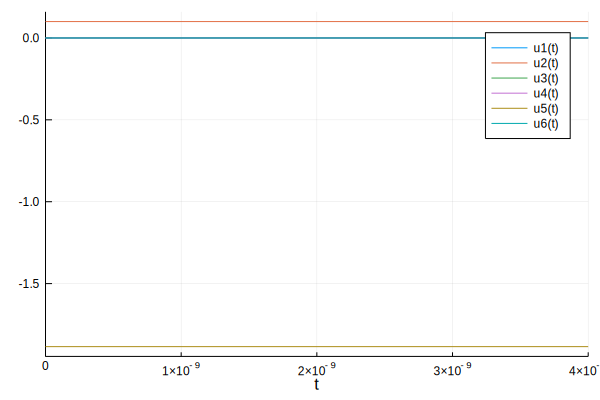

In [94]:
plot(sol)